In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_Panel|column_description'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding) 

pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

friendly_wave = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Friendlier_Description"]

Toggle code

var_type (8079, 14)
Wall time: 16.3 s


In [1]:
# %%time
# dataset_name = "W19_comb"
# df_list = [ "BES_Panel" ]

# %matplotlib inline 
# %run BES_header.py {dataset_name} {df_list}

# if "id" in BES_Panel.columns:
#     BES_Panel = BES_Panel.set_index("id").sort_index()

# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    
# # get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# # pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
# pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
# pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

# BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES_Panelv02",compression='zip')
# BES_Panel = BES_Panel.set_index("id")
# BES_Panel = BES_Panel.sort_index()


Toggle code

var_type (7911, 14)
Wall time: 1min 9s


In [ ]:
df = pd.DataFrame()

df["Age_at_W10"] = pan_dataset_ages["Age_at_W10"].round()
df["gender"] = BES_Panel["gender"]
df["Social: Liberalism(0) <-> Conservatism(200){uniform}"] = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
df["Economic: Left(0) <-> Right(200){uniform}"] = pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"]

In [ ]:
df = pd.DataFrame()


In [2]:
search(BES_Panel,"p_gross_")

p_gross_householdW1     30362
p_gross_personalW1      30372
p_gross_householdW2     30235
p_gross_personalW2      30237
p_gross_householdW3     28120
p_gross_personalW3      28120
p_gross_householdW4     31313
p_gross_personalW4      31307
p_gross_householdW5     30803
p_gross_personalW5      30800
p_gross_householdW6     30128
p_gross_personalW6      30126
p_gross_householdW7     30352
p_gross_personalW7      30292
p_gross_householdW8     33423
p_gross_personalW8      33413
p_gross_householdW9     30004
p_gross_personalW9      30000
p_gross_householdW10    30236
p_gross_personalW10     29216
p_gross_householdW11    30334
p_gross_personalW11     30209
p_gross_householdW12    33797
p_gross_personalW12     33623
p_gross_householdW13    30935
p_gross_personalW13     30780
p_gross_householdW14    30640
p_gross_personalW14     30620
p_gross_householdW15    30840
p_gross_personalW15     30294
p_gross_householdW16    37006
p_gross_personalW16     36863
p_gross_householdW17    34365
p_gross_pe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

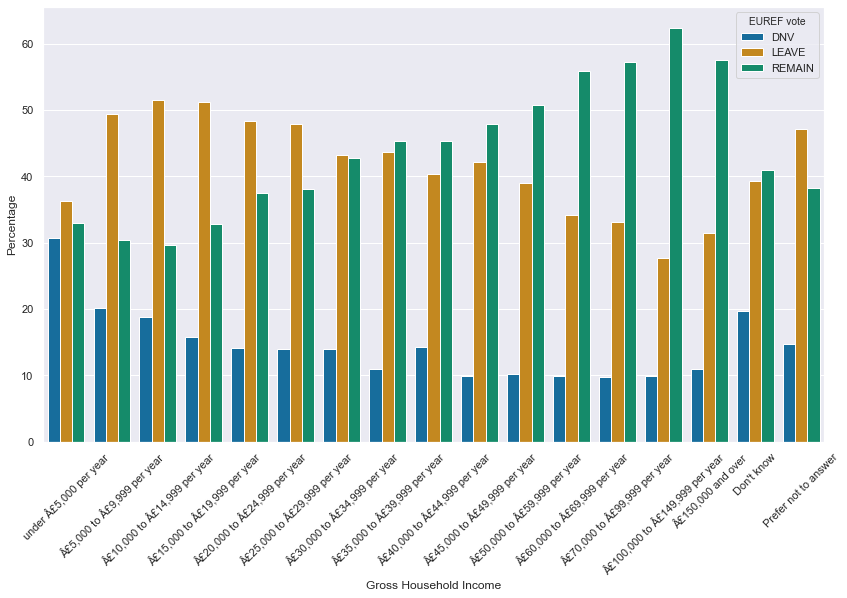

In [5]:
wts = BES_Panel["wt_new_W19_result"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = BES_Panel["p_gross_householdW19"]
xvar_nice_name = "Gross Household Income"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

In [ ]:
# but how much of this is the life cycle impact (e.g. income vs wealth)
# try controlling for age by focusing on a 'neutral' age group

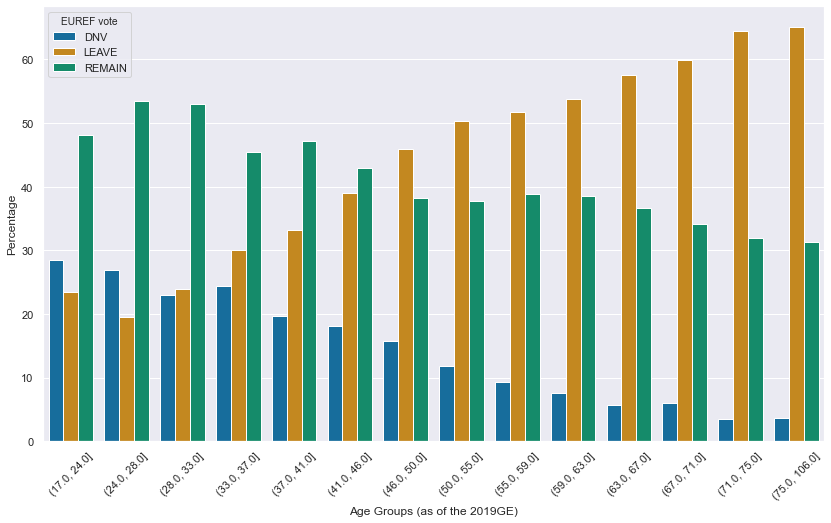

In [11]:
wts = BES_Panel["wt_new_W19_result"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"]
xvar_nice_name = "Age Groups (as of the 2019GE)"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

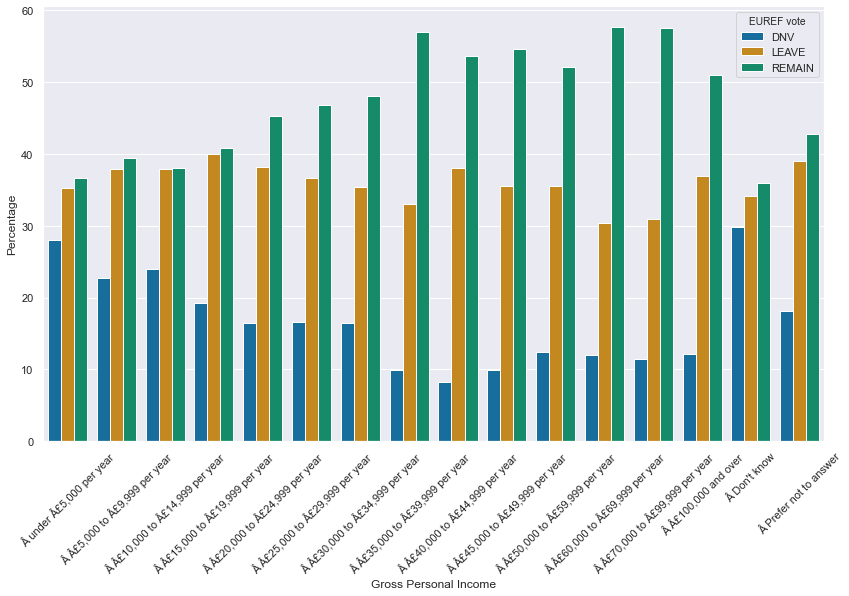

In [22]:
wts = BES_Panel["wt_new_W19_result"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = BES_Panel["p_gross_personalW19"]
xvar_nice_name = "Gross Personal Income"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()
mask = mask & pan_dataset_ages["Age_at_W19"].apply(lambda x: x<=60)


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

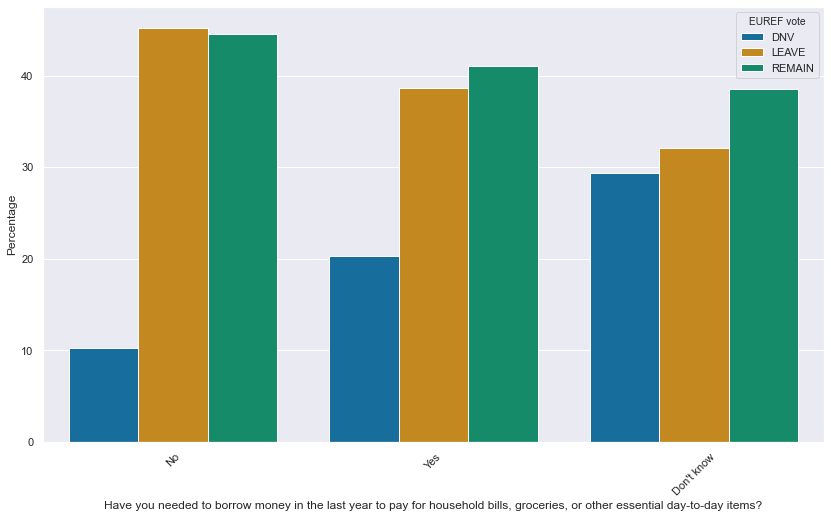

In [30]:
wts = BES_Panel["wt_new_W14"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = BES_Panel["borrowEssentialsW14"]
xvar_nice_name = "Have you needed to borrow money in the last year to pay for household bills, groceries, or other essential day-to-day items?"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()
# mask = mask & pan_dataset_ages["Age_at_W19"].apply(lambda x: x<=60)


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

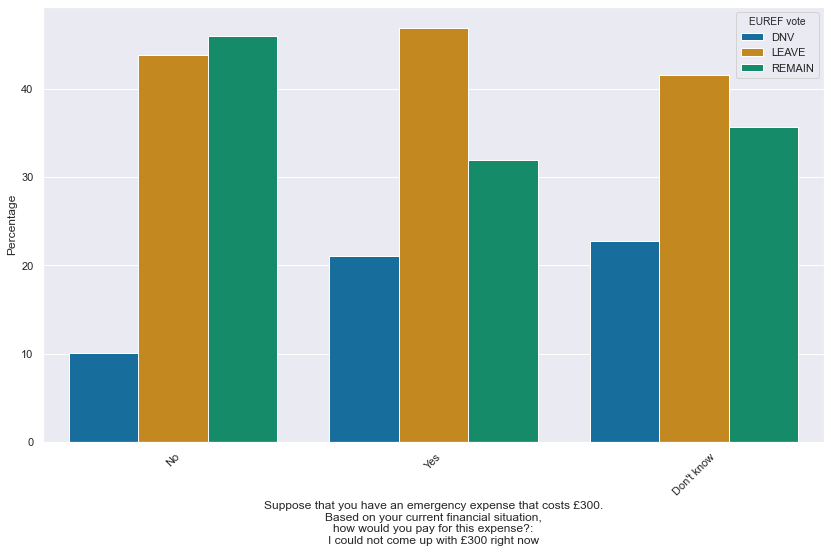

In [29]:
wts = BES_Panel["wt_new_W14"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = BES_Panel["smallEmergency_5W14"]
xvar_nice_name = "Suppose that you have an emergency expense that costs £300.\nBased on your current financial situation,\nhow would you pay for this expense?:\nI could not come up with £300 right now"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()
# mask = mask & pan_dataset_ages["Age_at_W19"].apply(lambda x: x<=60)


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

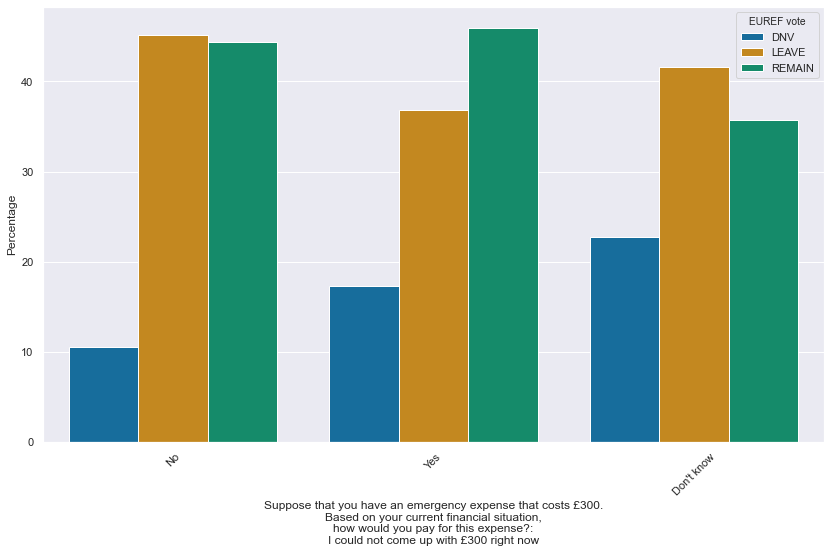

In [31]:
wts = BES_Panel["wt_new_W14"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = BES_Panel["smallEmergency_4W14"]
xvar_nice_name = "Suppose that you have an emergency expense that costs £300.\nBased on your current financial situation,\nhow would you pay for this expense?:\nI could not come up with £300 right now"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()
# mask = mask & pan_dataset_ages["Age_at_W19"].apply(lambda x: x<=60)


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

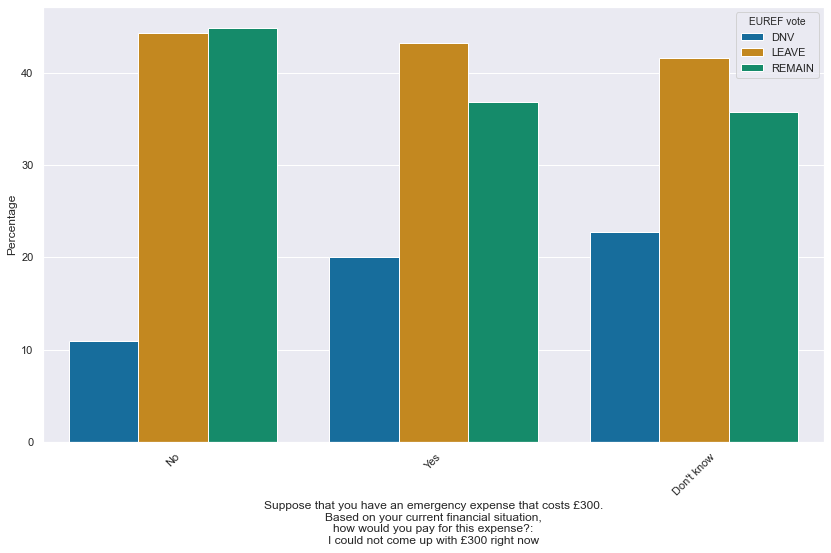

In [32]:
wts = BES_Panel["wt_new_W14"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = BES_Panel["smallEmergency_3W14"]
xvar_nice_name = "Suppose that you have an emergency expense that costs £300.\nBased on your current financial situation,\nhow would you pay for this expense?:\nI could not come up with £300 right now"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()
# mask = mask & pan_dataset_ages["Age_at_W19"].apply(lambda x: x<=60)


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

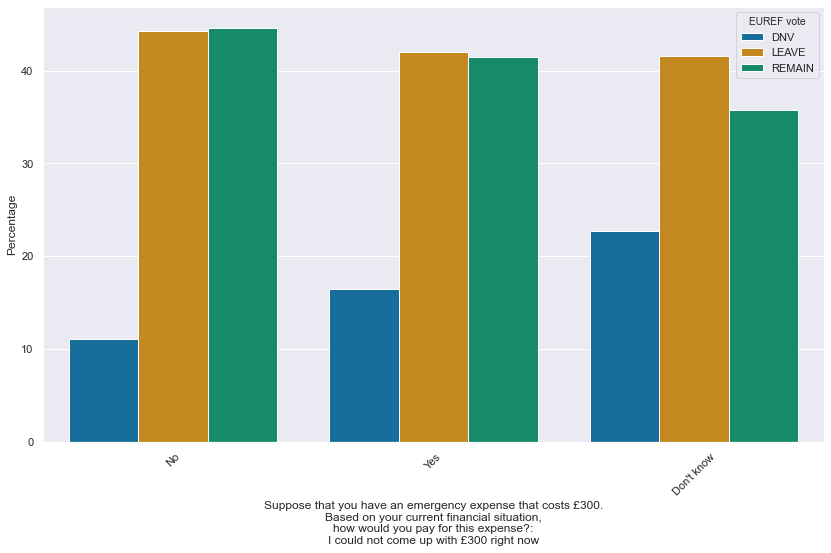

In [33]:
wts = BES_Panel["wt_new_W14"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = BES_Panel["smallEmergency_2W14"]
xvar_nice_name = "Suppose that you have an emergency expense that costs £300.\nBased on your current financial situation,\nhow would you pay for this expense?:\nI could not come up with £300 right now"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()
# mask = mask & pan_dataset_ages["Age_at_W19"].apply(lambda x: x<=60)


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

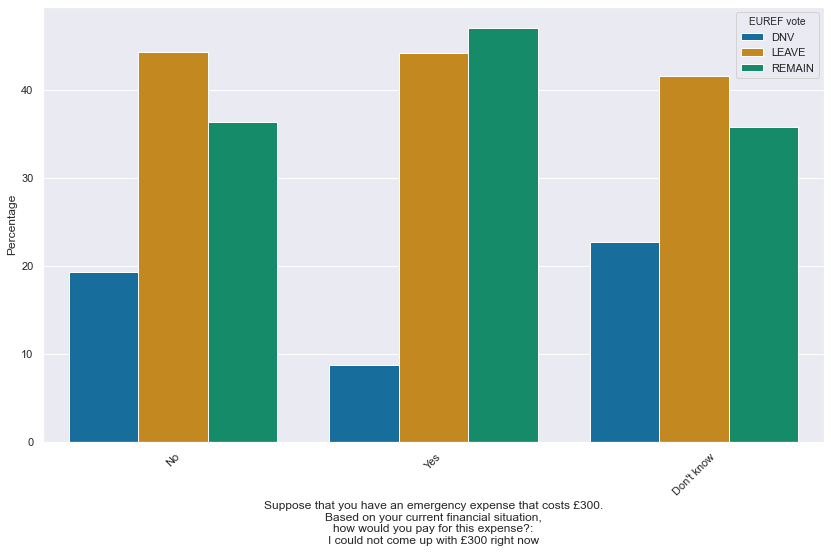

In [34]:
wts = BES_Panel["wt_new_W14"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
xvar = BES_Panel["smallEmergency_1W14"]
xvar_nice_name = "Suppose that you have an emergency expense that costs £300.\nBased on your current financial situation,\nhow would you pay for this expense?:\nI could not come up with £300 right now"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()
# mask = mask & pan_dataset_ages["Age_at_W19"].apply(lambda x: x<=60)


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x=xvar_nice_name,y="Percentage",hue="EUREF vote");
plt.xticks(rotation=45);

In [24]:
BES_Panel["borrowEssentialsW14"].value_counts()

No            27123
Yes            3264
Don't know      676
Name: borrowEssentialsW14, dtype: int64

In [26]:
search(BES_Panel,"smallEmergency")

smallEmergency_1W14     31063
smallEmergency_2W14     31063
smallEmergency_3W14     31063
smallEmergency_4W14     31063
smallEmergency_5W14     31063
smallEmergency_99W14    31063
dtype: int64

In [27]:
BES_Panel["smallEmergency_5W14"].value_counts()

No            26508
Yes            2777
Don't know     1778
Name: smallEmergency_5W14, dtype: int64

In [35]:
BES_Panel["likeConW19"]

id
1                     NaN
2                       7
3        Strongly dislike
4                     NaN
5                     NaN
               ...       
98447                 NaN
98448                 NaN
98449                   1
98450                 NaN
98451                 NaN
Name: likeConW19, Length: 97006, dtype: category
Categories (12, object): [Strongly dislike < 1 < 2 < 3 ... 8 < 9 < Strongly like < Don't know]

In [63]:
BES_Panel["p_eurefvote_minusdk"] = BES_Panel["p_eurefvote"].cat.remove_categories("Don't know")
replace_dict = {"United Kingdom Independence Party (UKIP)":"UKIP",
                "British National Party (BNP)":"BNP",
                "Scottish National Party (SNP)":"SNP"}

def quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=False):
    if final_version:
        n_boot=1000
    else:
        n_boot=10
    temp = BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
    mask = temp.notnull() & BES_Panel[wt_var].notnull()
    BES_Panel[like_var+"_num_wts"] = list(zip(temp,
                                                  BES_Panel[wt_var]))

    df = BES_Panel[[vote_var,like_var+"_num_wts"]][mask]
    #.groupby([vote_var])[like_var+"_num_wts"]
    # .reset_index()
    # .agg(weighted_mean)
    df = df.replace(replace_dict)
    plt.figure(figsize=(12,8));
    ax = sns.barplot(x = vote_var, y= like_var+"_num_wts", data=df,estimator=weighted_mean,
                     orient='v',n_boot=n_boot);
    plt.ylim([0,10]);
    ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

    # raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
    raw_sample_sizes = BES_Panel.groupby([vote_var])[like_var+"_num_wts"].count().sort_index(level=1).values

    # Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

    # Iterate through the list of axes' patches
    count = 0
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
                fontsize=10, color='red', ha='center', va='bottom')
        ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
                fontsize=10, color='black', ha='center', va='bottom', rotation=90)
        count = count + 1
    plt.ylabel(ylabel);
    plt.title(title);
    plt.xticks(rotation=45);
    return df

Wall time: 29.5 s


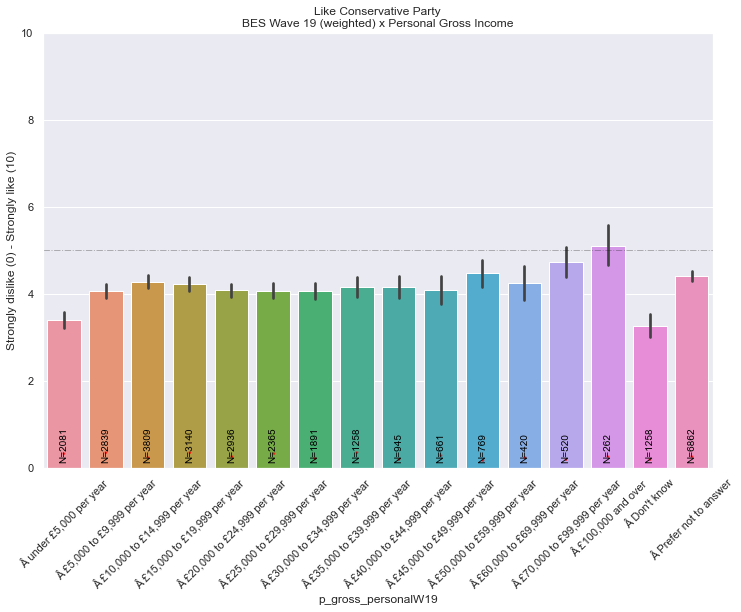

In [72]:
%%time
like_var = "likeConW19"
wt_var = "wt_new_W19_result"
vote_var = "p_gross_personalW19"
title = "Like Conservative Party\nBES Wave 19 (weighted) x Personal Gross Income"
ylabel = "Strongly dislike (0) - Strongly like (10)"
# euref_var = "p_eurefvote_minusdk"
df = quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=True)

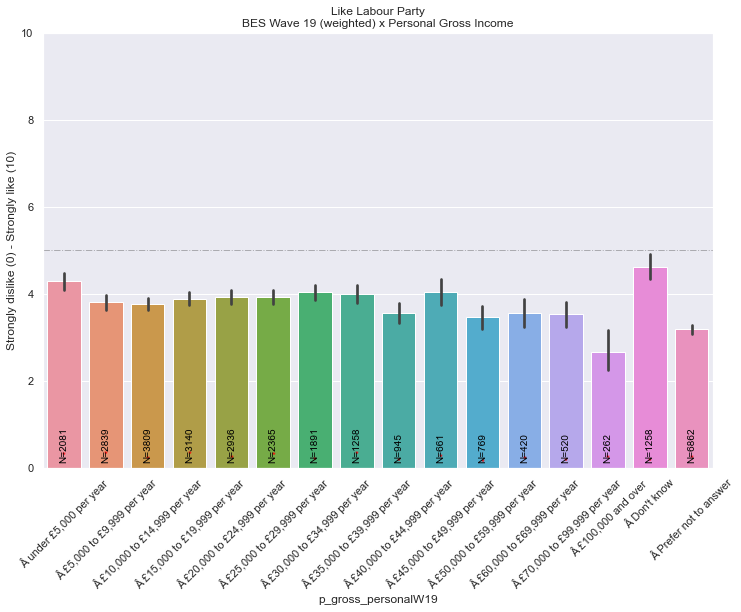

In [73]:
like_var = "likeLabW19"
wt_var = "wt_new_W19_result"
vote_var = "p_gross_personalW19"
title = "Like Labour Party\nBES Wave 19 (weighted) x Personal Gross Income"
ylabel = "Strongly dislike (0) - Strongly like (10)"
# euref_var = "p_eurefvote_minusdk"
df = quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=True)

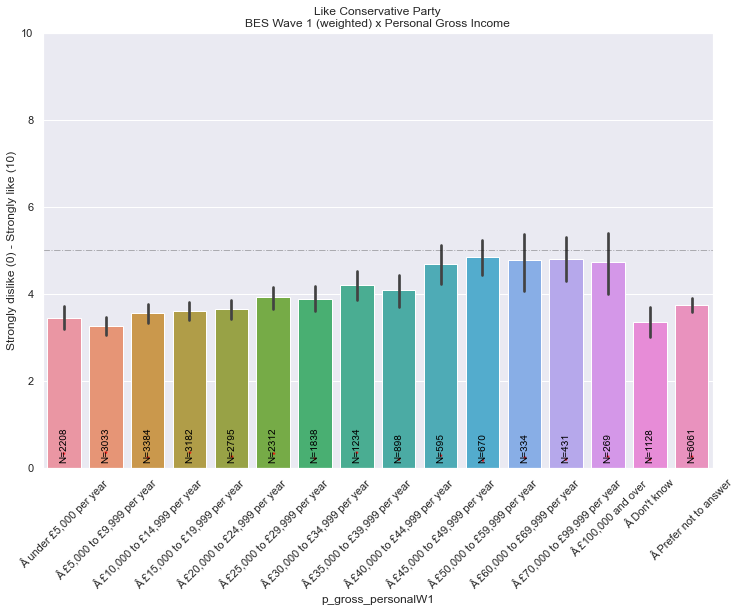

In [74]:
like_var = "likeConW1"
wt_var = "wt_full_W1"
vote_var = "p_gross_personalW1"
title = "Like Conservative Party\nBES Wave 1 (weighted) x Personal Gross Income"
ylabel = "Strongly dislike (0) - Strongly like (10)"
# euref_var = "p_eurefvote_minusdk"
df = quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=True)

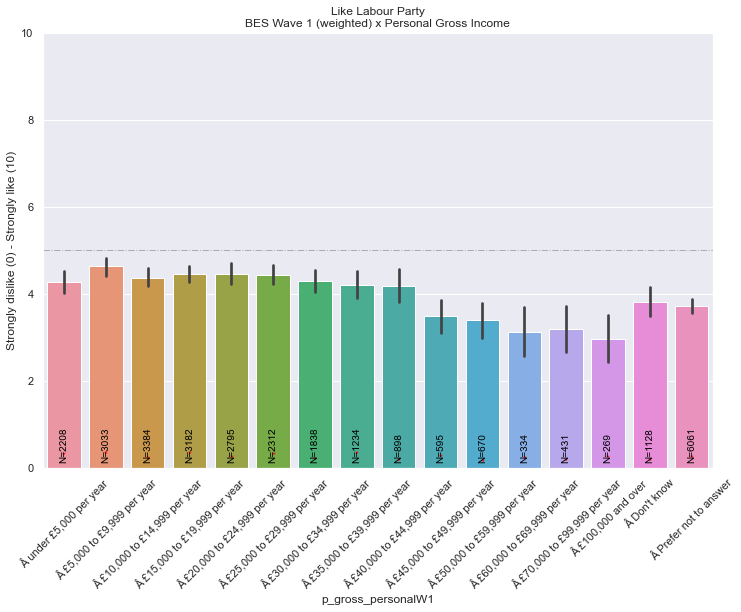

In [75]:
like_var = "likeLabW1"
wt_var = "wt_full_W1"
vote_var = "p_gross_personalW1"
title = "Like Labour Party\nBES Wave 1 (weighted) x Personal Gross Income"
ylabel = "Strongly dislike (0) - Strongly like (10)"
# euref_var = "p_eurefvote_minusdk"
df = quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=True)

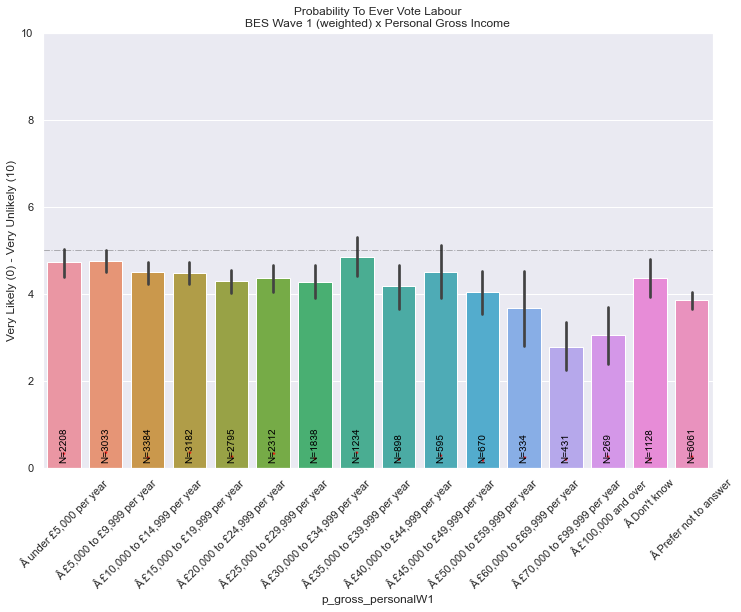

In [77]:
like_var = "ptvLabW1"
wt_var = "wt_full_W1"
vote_var = "p_gross_personalW1"
title = "Probability To Ever Vote Labour\nBES Wave 1 (weighted) x Personal Gross Income"
ylabel = "Very Likely (0) - Very Unlikely (10)"
df = quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=True)

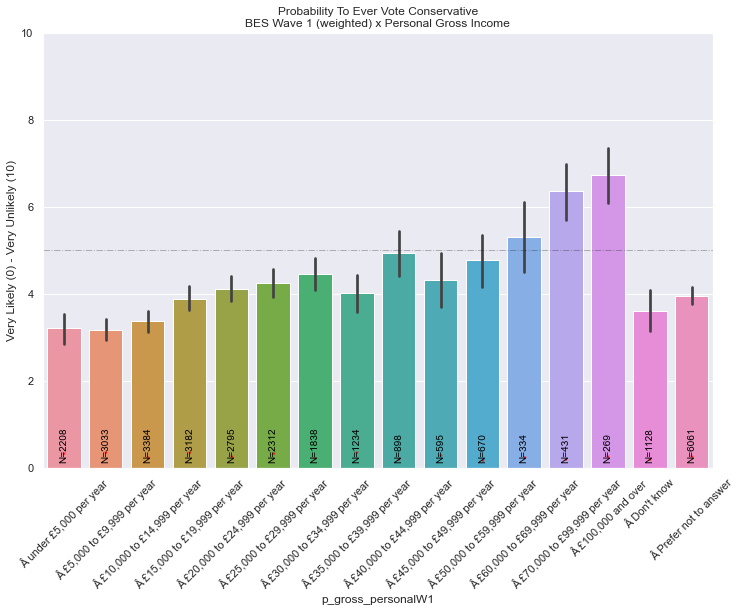

In [78]:
like_var = "ptvConW1"
wt_var = "wt_full_W1"
vote_var = "p_gross_personalW1"
title = "Probability To Ever Vote Conservative\nBES Wave 1 (weighted) x Personal Gross Income"
ylabel = "Very Likely (0) - Very Unlikely (10)"
df = quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=True)

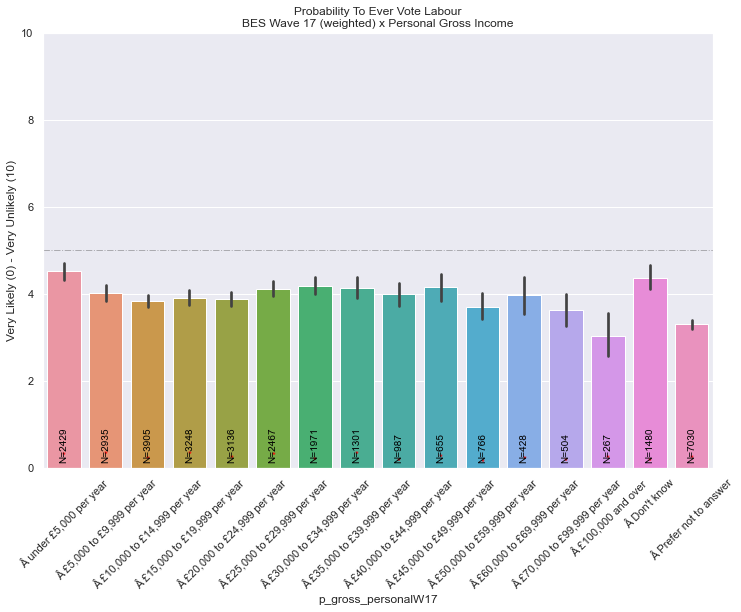

In [79]:
like_var = "ptvLabW17"
wt_var = "wt_new_W17"
vote_var = "p_gross_personalW17"
title = "Probability To Ever Vote Labour\nBES Wave 17 (weighted) x Personal Gross Income"
ylabel = "Very Likely (0) - Very Unlikely (10)"
df = quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=True)

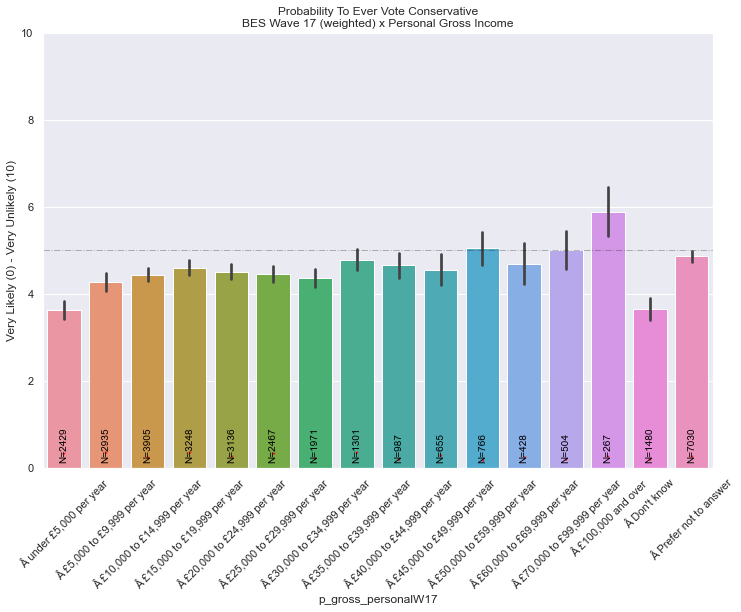

In [80]:
like_var = "ptvConW17"
wt_var = "wt_new_W17"
vote_var = "p_gross_personalW17"
title = "Probability To Ever Vote Conservative\nBES Wave 17 (weighted) x Personal Gross Income"
ylabel = "Very Likely (0) - Very Unlikely (10)"
df = quick_chart(like_var,vote_var,wt_var,title,ylabel,final_version=True)

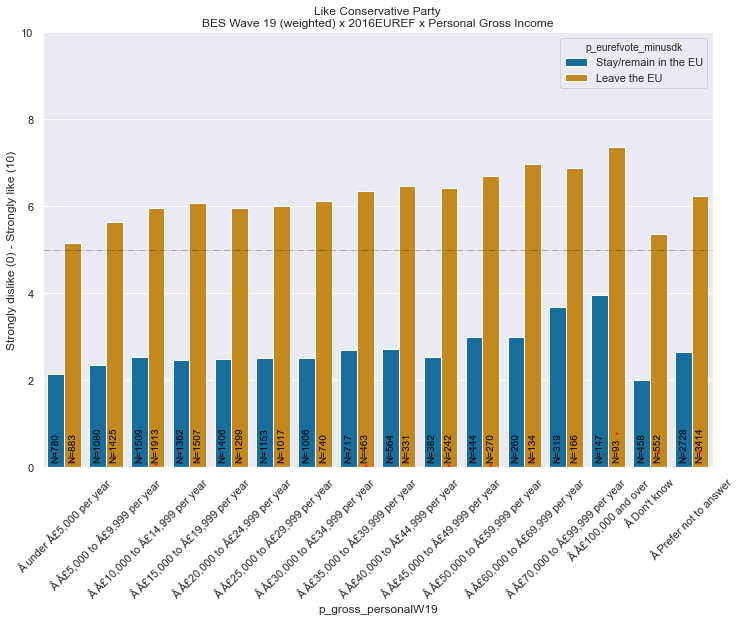

In [45]:
like_var = "likeConW19"
wt_var = "wt_new_W19_result"
vote_var = "p_gross_personalW19"
euref_var = "p_eurefvote_minusdk"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))

df = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).reset_index()
df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
ax = sns.barplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df);
plt.ylim([0,10]);
ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1).values

Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
count = 0
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
            fontsize=10, color='red', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)
    count = count + 1
plt.ylabel("Strongly dislike (0) - Strongly like (10)");
plt.title("Like Conservative Party\nBES Wave 19 (weighted) x 2016EUREF x Personal Gross Income");
plt.xticks(rotation=45);

In [90]:
colourmap = {'LAB':'red', 'UKIP':'purple', 'CON':'blue', 'SNP':'yellow', 'BNP':'black', 'LD':'orange', 'DNV':'dimgray', 'DK':'lightgray', 'OTH':'brown', 'GP':'green',
       'VER':'pink', 'PC':'olive', 'RES':'peru', "BXP":'cyan',"CUK":'black','LEAVE':'blue','REMAIN':'yellow',
       "???":'grey',"<18":'pink',"?":'grey',"NULL":'black', "UKIP&BXP&BNP":"purple"    }
replace_dict = {"DK":np.nan,"TYTV":np.nan,"UNK":np.nan,"BNP":np.nan,"SNP":np.nan,"PC":np.nan,"OTH":np.nan,
 "UKIP":"UKIP&BXP&BNP","BXP":"UKIP&BXP&BNP","BNP":"UKIP&BXP&BNP"}

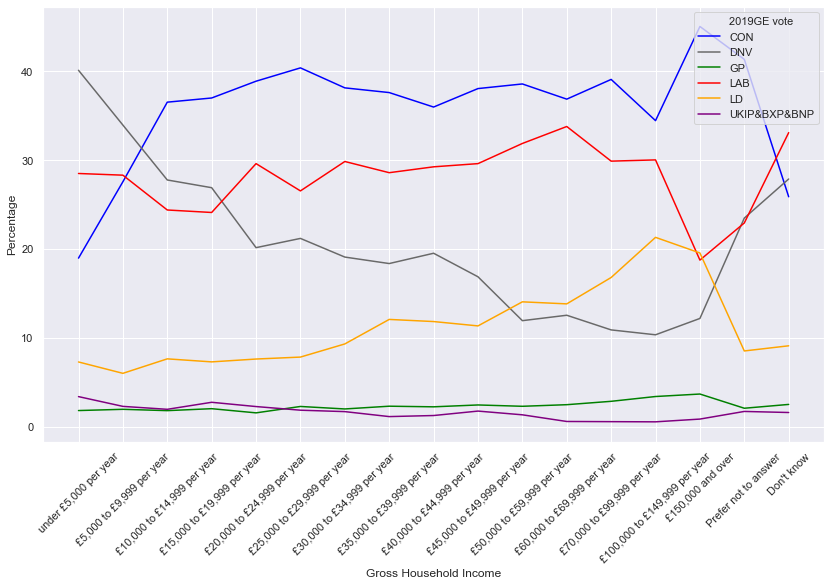

In [100]:
wts = BES_Panel["wt_new_W19_result"]
eurefvote = pan_dataset_votes["2019GEVote_simple"].replace(replace_dict)
xvar = BES_Panel["p_gross_householdW19"]
xvar_nice_name = "Gross Household Income"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"2019GE vote","Percentage"]
plt.figure(figsize=(14,8));
sns.lineplot(data=df,x=xvar_nice_name,y="Percentage",hue="2019GE vote",palette=colourmap);
plt.xticks(rotation=45);

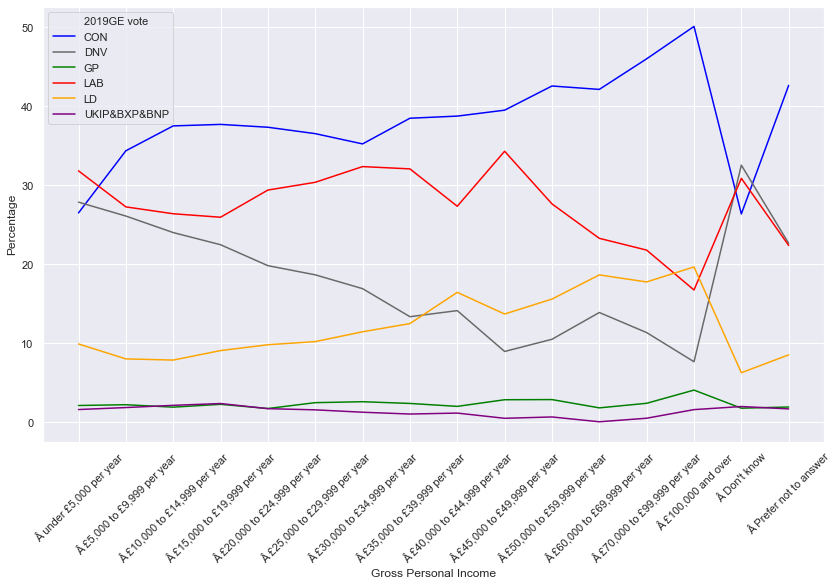

In [94]:
wts = BES_Panel["wt_new_W19_result"]
eurefvote = pan_dataset_votes["2019GEVote_simple"].replace(replace_dict)
xvar = BES_Panel["p_gross_personalW19"]
xvar_nice_name = "Gross Personal Income"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"2019GE vote","Percentage"]
plt.figure(figsize=(14,8));
sns.lineplot(data=df,x=xvar_nice_name,y="Percentage",hue="2019GE vote",palette=colourmap);
plt.xticks(rotation=45);

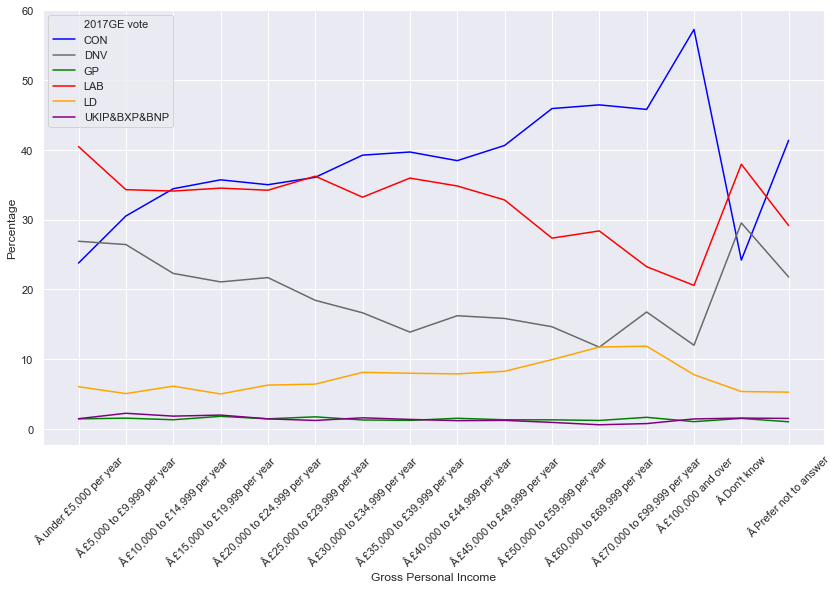

In [95]:
wts = BES_Panel["wt_new_W13_result"]
eurefvote = pan_dataset_votes["2017GEVote_simple"].replace(replace_dict)
xvar = BES_Panel["p_gross_personalW13"]
xvar_nice_name = "Gross Personal Income"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"2017GE vote","Percentage"]
plt.figure(figsize=(14,8));
sns.lineplot(data=df,x=xvar_nice_name,y="Percentage",hue="2017GE vote",palette=colourmap);
plt.xticks(rotation=45);

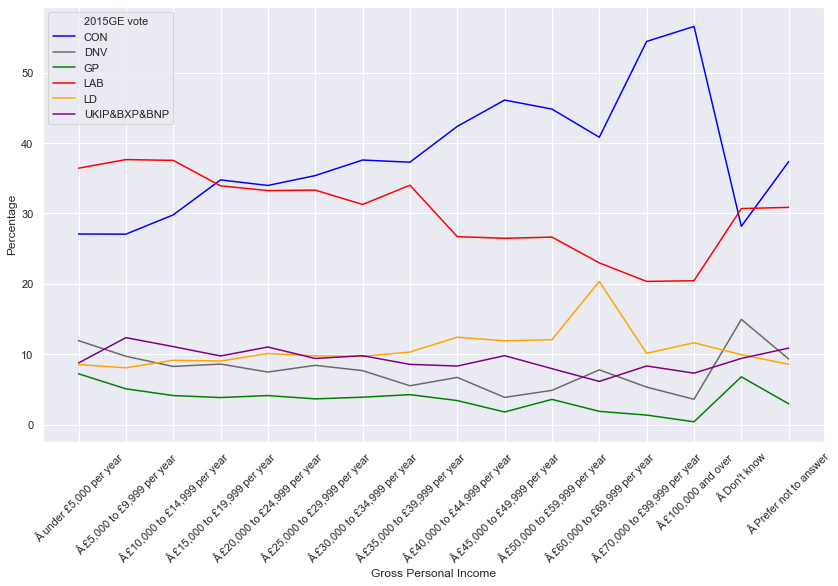

In [96]:
wts = BES_Panel["wt_full_W5"]
eurefvote = pan_dataset_votes["2015GEVote_simple"].replace(replace_dict)
xvar = BES_Panel["p_gross_personalW5"]
xvar_nice_name = "Gross Personal Income"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"2015GE vote","Percentage"]
plt.figure(figsize=(14,8));
sns.lineplot(data=df,x=xvar_nice_name,y="Percentage",hue="2015GE vote",palette=colourmap);
plt.xticks(rotation=45);

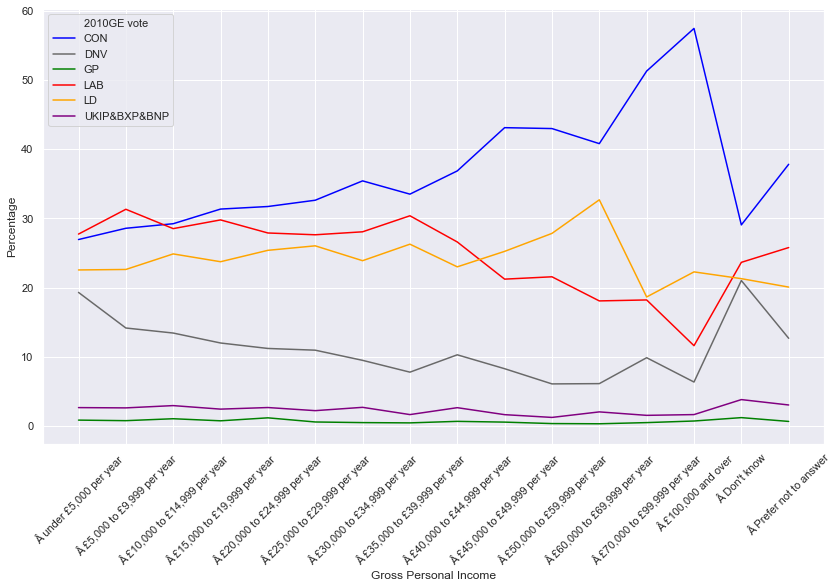

In [98]:
wts = BES_Panel["wt_full_W1"]
eurefvote = pan_dataset_votes["2010GEVote_simple"].replace(replace_dict)
xvar = BES_Panel["p_gross_personalW1"]
xvar_nice_name = "Gross Personal Income"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"2010GE vote","Percentage"]
plt.figure(figsize=(14,8));
sns.lineplot(data=df,x=xvar_nice_name,y="Percentage",hue="2010GE vote",palette=colourmap);
plt.xticks(rotation=45);

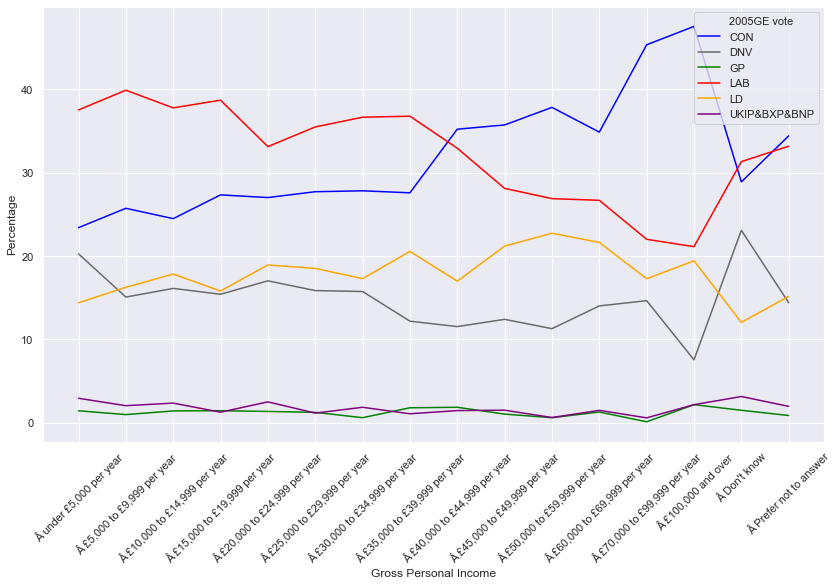

In [99]:
wts = BES_Panel["wt_full_W1"]
eurefvote = pan_dataset_votes["2005GEVote_simple"].replace(replace_dict)
xvar = BES_Panel["p_gross_personalW1"]
xvar_nice_name = "Gross Personal Income"

mask = wts.notnull()&eurefvote.notnull()&xvar.notnull()


ct = pd.crosstab(index=xvar[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = [xvar_nice_name,"2005GE vote","Percentage"]
plt.figure(figsize=(14,8));
sns.lineplot(data=df,x=xvar_nice_name,y="Percentage",hue="2005GE vote",palette=colourmap);
plt.xticks(rotation=45);

In [ ]:
# horizontal stacked bar chart!